In [1]:
import numpy as np
import matplotlib.pyplot as plt
import homework2 as shuf

In [5]:
mean = 0
min_range = -5
max_range = 5
std = 1

In [6]:
# functions for Gaussian with myran()
def Norm_dist():
    global mean, std
    
    var1 = shuf.myran()
    var2 = shuf.myran()
    x1 = np.cos(2 * np.pi * var1) * np.sqrt(-2 * np.log(1 - var2))
    x2 = np.sin(2 * np.pi * var1) * np.sqrt(-2 * np.log(1 - var2))
    
    return x1, x2

In [14]:
n = 1000000

arr_RN = np.zeros(n)

for _ in range(n // 2):
    y1, y2 = Norm_dist()
    arr_RN[_ * 2] = y1
    arr_RN[_ * 2 + 1] = y2

In [16]:
def normal_distribution(x):
    return (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std) ** 2)

t = np.linspace(min_range, max_range, 100)

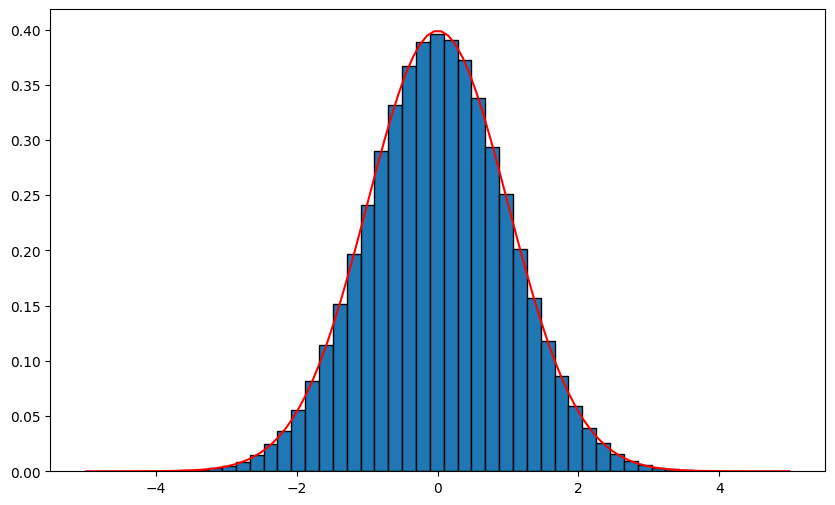

In [17]:
plt.figure(figsize=(10, 6))
red = plt.plot(t, normal_distribution(t), 'r')
cmp1 = plt.hist(arr_RN, bins=50, density=True, edgecolor='black')
plt.show()

In [18]:
from scipy.interpolate import interp1d

hist_x = (cmp1[1][:-1] + cmp1[1][1:]) / 2 #gpt 이용하여 유사도 검사를 위한 히스토그램의 데이터 타입 확인
hist_y = cmp1[0]

red_x = t
red_y = normal_distribution(t)

interp_hist_y = interp1d(hist_x, hist_y, kind='linear', fill_value="extrapolate")
aligned_hist_y = interp_hist_y(red_x)

similarity = np.mean((red_y - aligned_hist_y)**2)
print(f"Mean Squared Error (MSE): {similarity}")

Mean Squared Error (MSE): 1.2559192512692093e-06
